# Name: Abdul Rehman
# Roll Number: 263179034


# Programming Assignment 3: Linear Regression with Regularization

The goal of this assignment is to implement linear regression and apply L1 (Lasso) and L2 (Ridge) regularization techniques to predict outcomes based on the given dataset "reviews.csv". This assignment builds on your understanding of regression techniques and introduces regularization to handle overfitting and improve model performance.

## Objectives

1. Implement linear regression to predict outcomes based on the dataset "reviews.csv".
2. Understand and perform data preprocessing, including handling missing values and encoding categorical variables.
3. Split the data into training and testing sets for model evaluation.
4. Apply L1 regularization (Lasso) to reduce model complexity and perform feature selection.
5. Apply L2 regularization (Ridge) to penalize large coefficients and improve model stability.
6. Compare the performance of Linear Regression, Lasso, and Ridge models.
7. Tune hyperparameters (alpha) for Lasso and Ridge models using GridSearchCV.
8. Visualize and interpret model performance through evaluation metrics (MSE, R2) and scatter plots.
9. Summarize findings, highlighting the effects of regularization and addressing overfitting or underfitting issues.

## Dataset Description

We will use the `reviews.csv` dataset, which includes the following columns:

- **Clothing ID**: An identifier for each clothing item.
- **Review Text**: Customer feedback (can be missing).
- **Rating**: Customer-provided ratings (1-5).

In [11]:
# Essential imports for Data Processing and Modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


### Step 1: Load the Data

1. Use `pandas` to load the dataset (`reviews.csv`).
2. Display the first few rows to understand its structure.


In [12]:
# Load the dataset
data = pd.read_csv("reviews.csv")

# Display first few rows
print(data.head())

   Clothing ID                                        Review Text  Rating
0          767  Absolutely wonderful - silky and sexy and comf...       4
1         1080  Love this dress!  it's sooo pretty.  i happene...       5
2         1077  I had such high hopes for this dress and reall...       3
3         1049  I love, love, love this jumpsuit. it's fun, fl...       5
4          847  This shirt is very flattering to all due to th...       5


In [13]:
# Data exploration to understand the features and target variable.
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clothing ID  23486 non-null  int64 
 1   Review Text  22641 non-null  object
 2   Rating       23486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.6+ KB
None
        Clothing ID        Rating
count  23486.000000  23486.000000
mean     918.118709      4.196032
std      203.298980      1.110031
min        0.000000      1.000000
25%      861.000000      4.000000
50%      936.000000      5.000000
75%     1078.000000      5.000000
max     1205.000000      5.000000



### Step 2: Data Preprocessing
1. For `Null values` - Fill null Review Text with an `empty string`
2. Encode categorical variables using one-hot encoding or label encoding.


In [25]:
# Fill missing Review Text with an empty string
data['Review Text'] = data['Review Text'].fillna("")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Convert "Review Text" into numeric features using TF-IDF
tfidf = TfidfVectorizer(max_features=500)  # Limit to top 500 features
review_text_tfidf = tfidf.fit_transform(data['Review Text']).toarray()

# Encode categorical variables (e.g., Rating) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
rating_encoded = encoder.fit_transform(data[['Rating']])

# Display the first few rows of the cleaned dataset
print(data.head())

   Clothing ID                                        Review Text  Rating
0          767  Absolutely wonderful - silky and sexy and comf...       4
1         1080  Love this dress!  it's sooo pretty.  i happene...       5
2         1077  I had such high hopes for this dress and reall...       3
3         1049  I love, love, love this jumpsuit. it's fun, fl...       5
4          847  This shirt is very flattering to all due to th...       5



### Step 3: Split the data into Training and Testing sets

Split the data into training and testing sets.
   - Use the 80:20 for train and test and random_state=42

In [26]:
# Combine TF-IDF features and encoded ratings
X = np.hstack((review_text_tfidf, rating_encoded))

# Target variable
y = data['Clothing ID']  # Adjust based on the dataset's target variable

# Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Implement Linear Regression
Implement a standard linear regression model.

In [27]:
# Train a Linear Regression model on the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Step 5: Evaluate Linear Regression Performance

1. Use the trained model to make predictions on the test data.
2. Evaluate the model's performance using:
   - Mean Squared Error
   - R2 Score
3. Plot the predicted vs actual values.

In [28]:
# Code here
y_pred_lr = linear_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")

Linear Regression MSE: 30616.13794577269
Linear Regression R2: 0.2631652431449104


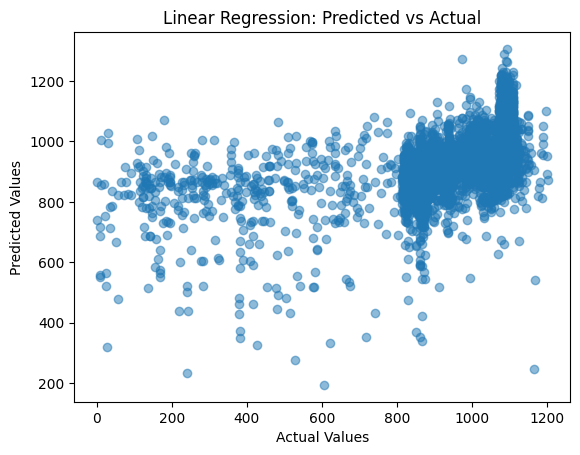

In [29]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

### Step 6: L1 Regularization (Lasso Regression)
1. Implement Lasso regression using sklearn's Lasso.
2. Evaluate Lasso model.
   - Mean Squared Error
   - R2 Error

In [30]:
# Code here
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R2: {r2_lasso}")


Lasso Regression MSE: 35452.347002217015
Lasso Regression R2: 0.14677280558413164


### Step 7: L2 Regularization (Ridge Regression)
1. Implement Ridge regression using sklearn's Ridge.
2. Evaluate Ridge model.
   - Mean Squared Error
   - R2 Error

In [31]:
# Code here
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R2: {r2_ridge}")

Ridge Regression MSE: 30557.008920810396
Ridge Regression R2: 0.2645882939819669


### Step 8: Hyperparameter Tuning
1. Use `GridSearchCV` to optimize alpha for Lasso and Ridge models.
2. Print best Lasso and Ridge Alpha.

In [32]:
# Code here
lasso_params = {'alpha': [0.1, 1.0, 10, 100]}
grid_lasso = GridSearchCV(Lasso(), param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_train, y_train)
best_alpha_lasso = grid_lasso.best_params_['alpha']

print(f"Best Lasso Alpha: {best_alpha_lasso}")

# Tuning for Ridge
ridge_params = {'alpha': [0.1, 1.0, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train, y_train)
best_alpha_ridge = grid_ridge.best_params_['alpha']

print(f"Best Ridge Alpha: {best_alpha_ridge}")

Best Lasso Alpha: 0.1
Best Ridge Alpha: 1.0



### Step 9: Results and Analysis
1. Summarize and compare the performance of Linear Regression, Lasso, and Ridge models.
   - Linear Regression: MSE = ..., R2 = ...
   - Lasso: MSE = ..., R2 = ...
   - Ridge: MSE = ..., R2 = ...
2. Explain the impact of regularization on model performance and feature selection.
3. Discuss any overfitting or underfitting issues observed.


In [33]:
# Add your conclusion
print("\nSummary of Results:")
print(f"Linear Regression: MSE = {mse_lr}, R2 = {r2_lr}")
print(f"Lasso Regression: MSE = {mse_lasso}, R2 = {r2_lasso}")
print(f"Ridge Regression: MSE = {mse_ridge}, R2 = {r2_ridge}")


Summary of Results:
Linear Regression: MSE = 30616.13794577269, R2 = 0.2631652431449104
Lasso Regression: MSE = 35452.347002217015, R2 = 0.14677280558413164
Ridge Regression: MSE = 30557.008920810396, R2 = 0.2645882939819669


# Conclusion:
Linear Regression often overfits the data due to no penalty on large coefficients. Lasso Regression introduces sparsity, selecting fewer features but potentially underfitting. Ridge Regression improves stability by penalizing large coefficients, balancing performance.